<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [183]:
int(str(504)[::-1])

405

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Для того, чтобы результаты экспериментов можно было повторить при перезапуске ноутбука. 

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [7]:
df = pd.concat([df_train, df_test])

#### Пропуски

In [8]:
for i in df.isnull().sum().to_frame()[df.isnull().sum().to_frame()[0] > 0].index:
    print(i)

mileage
engine
max_power
torque
seats


#### Дубликаты

In [12]:
df[df.duplicated()]

name  year  selling_price  \
254                     Hyundai Grand i10 Sportz  2017         450000   
258                             Maruti Swift VXI  2012         330000   
324     Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                                Lexus ES 300h  2019        5150000   
326               Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
..                                           ...   ...            ...   
966                                 Honda City S  2011         450000   
971                  Maruti Ertiga SHVS ZDI Plus  2017         750000   
974  Toyota Innova 2.5 G (Diesel) 8 Seater BS IV  2005         310000   
984                              Maruti Ritz VDi  2012         300000   
987                           Tata Indigo CS eVX  2013         227999   

     km_driven    fuel seller_type transmission         owner     mileage  \
254      35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258      50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324       9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325      20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326      45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
..         ...     ...         ...          ...           ...         ...   
966     110000  Petrol  Individual       Manual   Third Owner   16.8 kmpl   
971      50000  Diesel  Individual       Manual   First Owner  24.52 kmpl   
974     200000  Diesel  Individual       Manual  Second Owner   12.8 kmpl   
984      70000  Diesel  Individual       Manual   First Owner   23.2 kmpl   
987      60000  Diesel  Individual       Manual  Second Owner   25.0 kmpl   

      engine   max_power                     torque  seats  
254  1197 CC      82 bhp             114Nm@ 4000rpm    5.0  
258  1197 CC    85.8 bhp             114Nm@ 4000rpm    5.0  
324  1999 CC     177 bhp        430Nm@ 1750-2500rpm    5.0  
325  2487 CC  214.56 bhp        202Nm@ 3600-5200rpm    5.0  
326  1999 CC     177 bhp        430Nm@ 1750-2500rpm    5.0  
..       ...         ...                        ...    ...  
966  1497 CC   116.4 bhp             146Nm@ 4800rpm    5.0  
971  1248 CC    88.5 bhp             200Nm@ 1750rpm    7.0  
974  2494 CC     102 bhp  20.4@ 1400-3400(kgm@ rpm)    8.0  
984  1248 CC   73.94 bhp             190Nm@ 2000rpm    5.0  
987  1396 CC   69.01 bhp        140Nm@ 1800-3000rpm    5.0  

[1170 rows x 13 columns]

#### Дашборд

In [14]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [14]:
from ydata_profiling import ProfileReport

In [15]:
ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Выводы

- В датасете присутствует незначительное число дубликатов (менее 10%)
- Некоторые поля имеют пропуски, но их доля составляет менее 3% 
- Среди поля `name`, содержащего информацию о марке, модели и комплектации/спецификации авто наиболее часто упоминаюся марки Hyundai, Maruti, Mahindra и Tata, а в спецификации часто указывается дизельный двигатель 
- В датасете представлены автомобили с 1983 по 2020 год, в среднем исследуемые автомобили были произведены в 2013-2014 году
- Исследуемые автомобили имеют стоимость от 29999 до 10.000.000 у.е., в среднем автомобили стоят 636813 у.е. (судя по обилию индийских авто, можно предположить, что это у.е. – это рупии)
- В датасете встречаются как новые автомобили, с пробегом около 1 км, так и уже подержанные, средний пробег составляет 69000 км
- Большинство автомобилей – дизельные (54%), ещё 45% – бензиновые, остальные – на газу (CNG и LPG) 
- Почти все автомобили (83%) продаются частными лицами
- Почти все автомобили (87%) оснащены МКПП

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

#### Основные статистики (числовые переменные)

In [16]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [20]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

#### Основные статистики (категориальные переменные)

In [22]:
df_train.describe(include=[object])  

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [24]:
df_train.describe(include=[object])  

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

#### Средние

In [18]:
print(f'''Mean (train): {df_train.selling_price.mean()}''')
print(f'''Median (train): {df_train.selling_price.median()}''')
print(f'''Mean (test): {df_test.selling_price.mean()}''')
print(f'''Median (test): {df_test.selling_price.median()}''')

Mean (train): 639515.1971710244
Median (train): 450000.0
Mean (test): 617901.042
Median (test): 434999.0


#### Выводы

Для данного разбиения на `train` и `test` характерны более высокие значения среднего и медианы в `train`, что позволяет предположить, что в тестовую группу попало больше более недорогих машин, и при построении модели оценка для тестовой группы будет получаться завышенной

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [ ]:
# your code here

In [60]:
# df_train.columns

In [20]:
df_to_check_duplicates = df_train[['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']]
df_to_check_duplicates[df_to_check_duplicates.duplicated()]

name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
254   Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258   Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268   Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324       Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325       Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   
...          ...          ...           ...         ...      ...         ...   
6947  Individual       Manual  Second Owner   18.0 kmpl   995 CC      62 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC   98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC      74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   

                   torque  seats  
254        114Nm@ 4000rpm    5.0  
258        114Nm@ 4000rpm    5.0  
268        114Nm@ 4000rpm    5.0  
324   430Nm@ 1750-2500rpm    5.0  
325   202Nm@ 3600-5200rpm    5.0  
...                   ...    ...  
6947      90.3Nm@ 4200rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 12 columns]

In [22]:
df_train = df_train.drop_duplicates(subset=['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'], keep='first')

In [24]:
df_train.reset_index(drop=True, inplace = True)

In [26]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [36]:
# your code here

In [28]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [30]:
# def object_to_float(x):
#     return (float(x.split(' ')[0])) -- почему-то такой базовый код не работал, видимо, в колонках может лежать что-то ещё 

def object_to_float(x):
    if isinstance(x, str) and x.split(' ')[0] != '':
        return float(x.split(' ')[0])
    elif isinstance(x, (int, float)):
        return float(x)
    else:
        return float('nan') # чат gpt 4.0 помог обработать все ошибки 
    
df_train['mileage'] = df_train['mileage'].apply(lambda x: object_to_float(x))
df_train['engine'] = df_train['engine'].apply(lambda x: object_to_float(x))
df_train['max_power'] = df_train['max_power'].apply(lambda x: object_to_float(x))

df_test['mileage'] = df_test['mileage'].apply(lambda x: object_to_float(x))
df_test['engine'] = df_test['engine'].apply(lambda x: object_to_float(x))
df_test['max_power'] = df_test['max_power'].apply(lambda x: object_to_float(x))

In [42]:
df_train.head(5)

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   First Owner    23.00  1396.0      90.00   
3  Individual       Manual   First Owner    16.10  1298.0      88.20   
4  Individual       Manual   First Owner    20.14  1197.0      81.86   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [44]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

                    torque  seats  
0  260 Nm at 1800-2200 rpm    7.0  
1      260Nm@ 1500-2750rpm    5.0  
2           172Nm@ 4300rpm    5.0  
3           200Nm@ 1750rpm    5.0  
4     96  Nm at 3000  rpm     5.0

In [42]:
# df_train.torque.unique()

В `Torque` вообще данные лежат в очень разном формате – есть и Ньютон-метры, и кг-метры, а где-то вообще размерность указана в конце; первое число всегда отвечает за собственно `torque`(крутящий момент), второе – за обороты в секунду; будем приводить крутящий момент в Ньютон-метры

https://www.convertunits.com/from/kg-m/to/N-m

А ещё записи не всегда разделены пробелом, так что просто сделать `.split()` – не самая лучшая идея

In [32]:
def torque(x):
    if pd.isna(x):
        return None
    num = ''
    for i in str(x):
        # достаём первое число
        if i.isdigit() or i == '.' or i == ',':  
            num += i
        if i == '@' or i == 'a':  
            break 
    if num == '':
        return None
    num = float(num)
    if 'kg' in str(x).lower():
        num = num * 9.80665
    return num

# df_train['torque'].apply(lambda x: torque(x))
# df_test['torque'].apply(lambda x: torque(x))

In [34]:
import re

In [36]:
def max_torque_rpm(x):
    if pd.isna(x):
        return None    
    # так как мы ищем максимальное число оборотов, будем искать последнее число
    nums = re.findall(r'\d+(?:\.\d+)?', str(x))
    return float(nums[-1])  

# df_train['torque'].apply(lambda x: max_torque_rpm(x))
# df_test['torque'].apply(lambda x: max_torque_rpm(x))

In [38]:
df_train['max_torque_rpm'] = df_train['torque'].apply(lambda x: max_torque_rpm(x))
df_train['torque'] = df_train['torque'].apply(lambda x: torque(x))

df_test['max_torque_rpm'] = df_test['torque'].apply(lambda x: max_torque_rpm(x))
df_test['torque'] = df_test['torque'].apply(lambda x: torque(x))

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
    - По тестовым свою, по тренировочным — свою
    - По тренировочным данным для `train` и `test`






In [ ]:
# your code here

In [54]:
df_train.isnull().sum().sum()

1116

In [56]:
df_test.isnull().sum().sum()

114

In [40]:
numeric_columns = df_train.select_dtypes(include=['number'])

median_values = numeric_columns.median()

df_train[numeric_columns.columns] = df_train[numeric_columns.columns].fillna(median_values)
df_test[numeric_columns.columns] = df_test[numeric_columns.columns].fillna(median_values)


In [42]:
assert(df_train.isnull().sum().sum() == 0)
assert(df_test.isnull().sum().sum() == 0)

Мы используем медиану, так как она более устойчива к выбросам и лучше объясняет большую часть данных

Мы берём медиану на тренировочной выборке, чтобы избежать утечки данных и искуственного подстроения тестового датасета под себя же 

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [ ]:
# your code here

`Your answer here`

In [44]:
def float_to_int(x):
    return int(round(x))

df_train['engine'] = df_train['engine'].apply(lambda x: float_to_int(x))
df_train['seats'] = df_train['seats'].apply(lambda x: float_to_int(x))

df_test['engine'] = df_test['engine'].apply(lambda x: float_to_int(x))
df_test['seats'] = df_test['seats'].apply(lambda x: float_to_int(x))

Вообще из жизненного опыта заметен факт, что большинство легковых автомобилей – пятиместные; если мест больше чем 5 – это как правило минивен или большой внедорожник, вроде условного BMW X7, если мест меньше – то это либо спортивное купе, либо совсем небольшой автомобиль А-класса, следовательно, можно предположить, что для большинства наблюдений значение `seats` будет равно 5, а в ином случае нам вряд ли будет важна именно численная разница – очень мало автомобилей имеют 3 или 6 сидений, их как правило 2, 4, 5 или 7 (если мы говорим про легковые авто), и в данной ситуации кодирование `seats` как категориальной переменной могло бы помочь сделать флаги на то, является ли наше ТС малолитражкой, или наоборот чем-то большим, что возможно лучше объяснит цену, нежели просто линейная зависимость от количества сидений

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [46]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        torque        seats  max_torque_rpm  
count  5840.000000  5.840000e+03  5840.000000     5840.000000  
mean     87.906371  3.443522e+03     5.426712     2902.946575  
std      31.640418  8.972951e+04     0.982344     1038.348637  
min       0.000000  4.707192e+01     2.000000        0.000000  
25%      68.000000  1.118000e+02     5.000000     2000.000000  
50%      81.860000  1.600000e+02     5.000000     2800.000000  
75%      99.000000  2.000557e+02     5.000000     3750.000000  
max     400.000000  4.002000e+06    14.000000     5300.000000

In [48]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        torque        seats  max_torque_rpm  
count  1000.000000   1000.000000  1000.000000     1000.000000  
mean     90.841670    188.518577     5.403000     2968.656000  
std      34.893389    357.940378     0.912921     1019.781233  
min      34.200000     48.000000     4.000000        0.000000  
25%      69.000000    111.700000     5.000000     2250.000000  
50%      82.425000    160.000000     5.000000     2800.000000  
75%     102.000000    206.000000     5.000000     4000.000000  
max     280.000000  11011.200000     9.000000     5200.000000

`Your answer here`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [ ]:
# your code here

In [68]:
%matplotlib inline

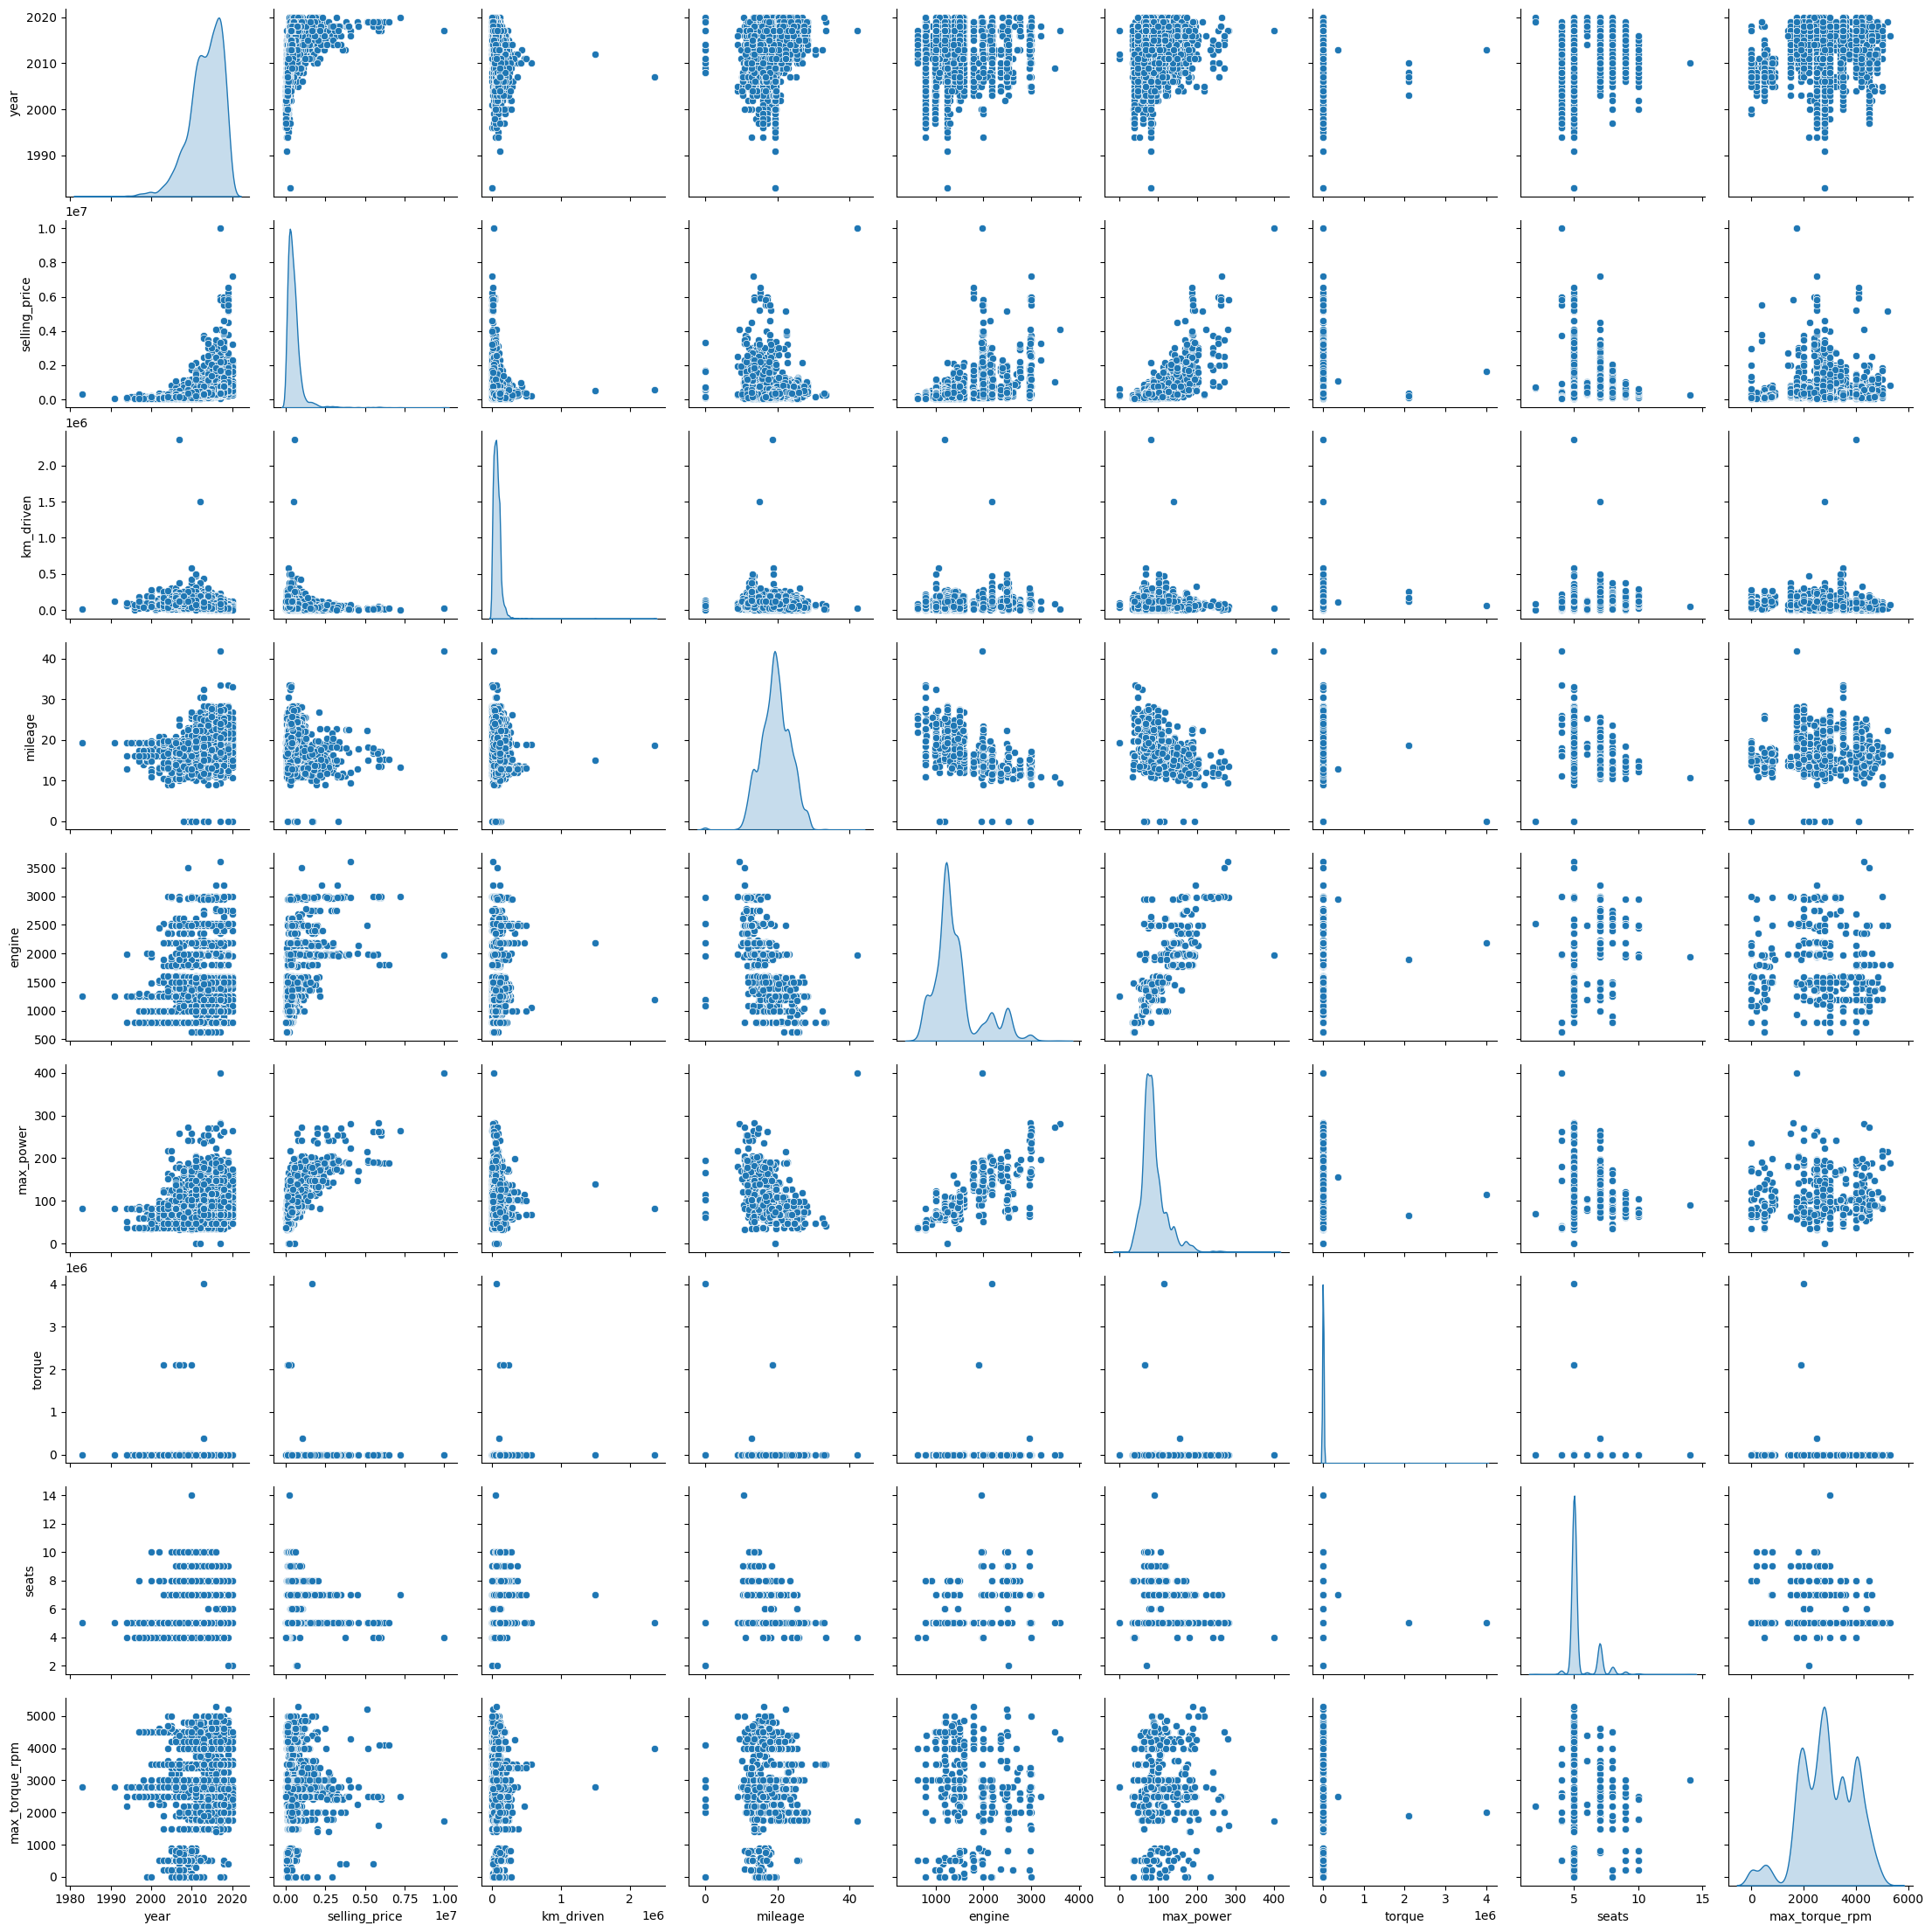

In [70]:
sns.pairplot(df_train[numeric_columns.columns], diag_kind='kde')

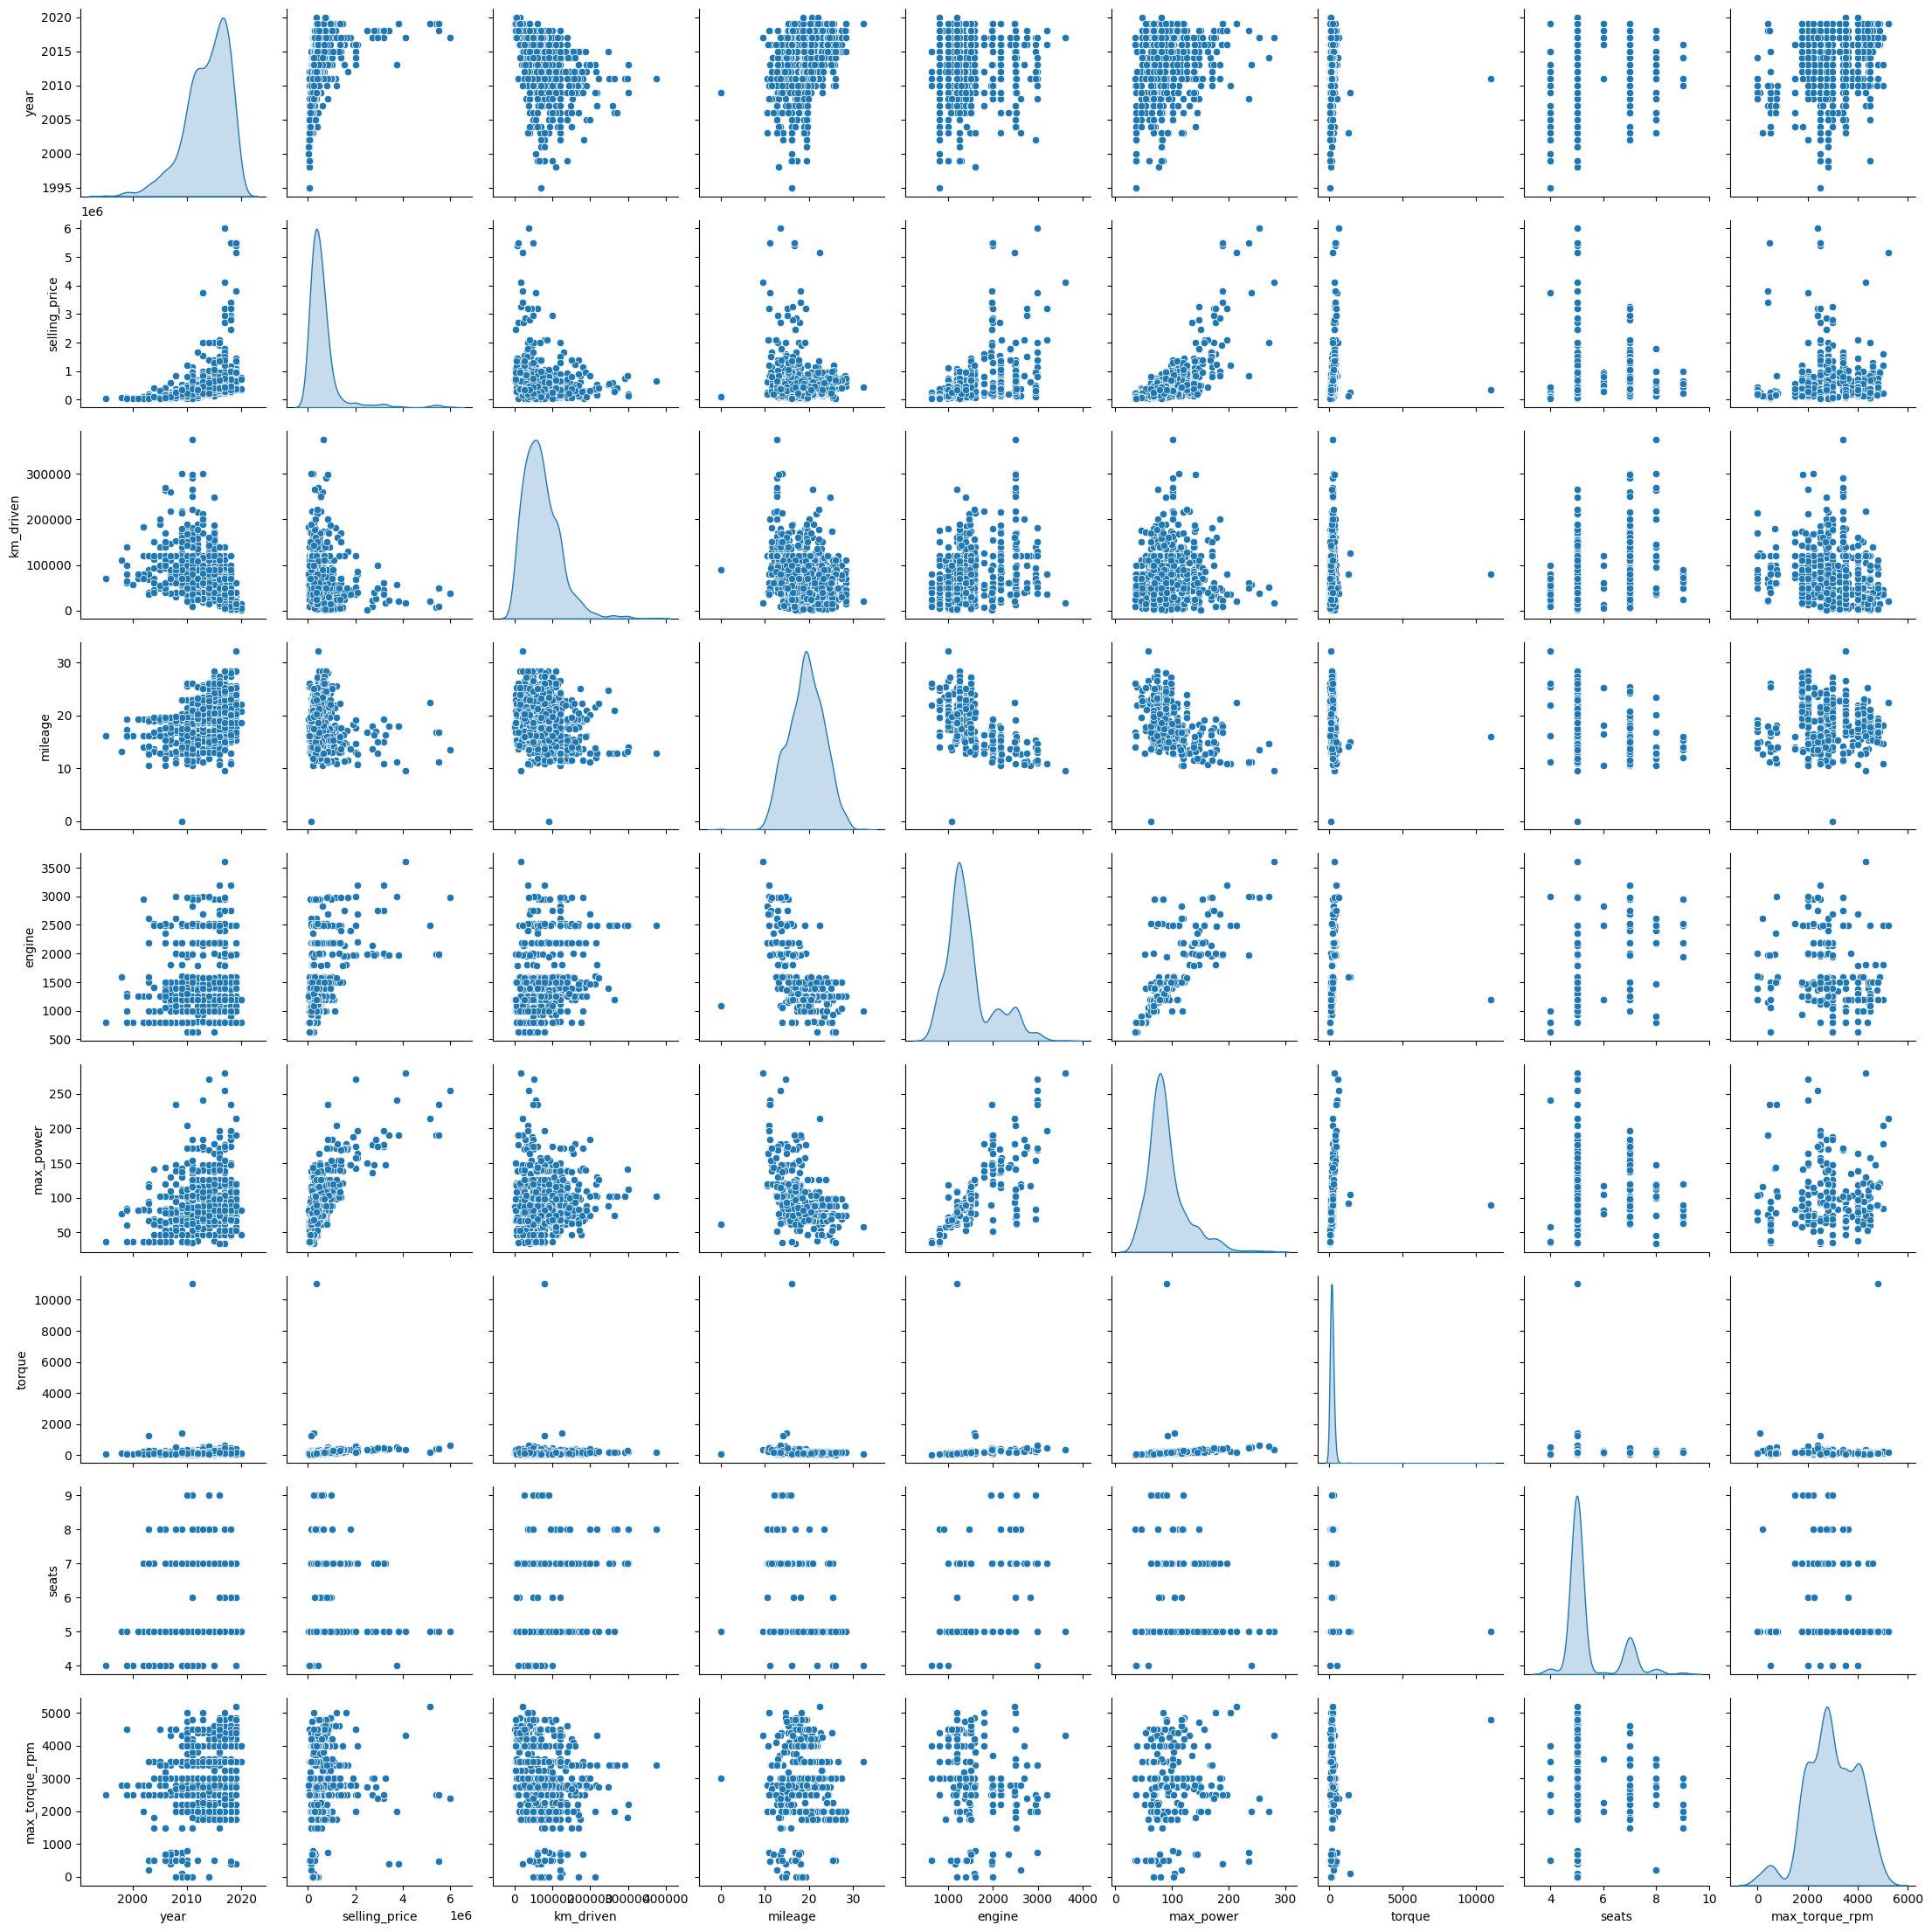

In [71]:
sns.pairplot(df_test[numeric_columns.columns], diag_kind='kde')

- В целом связь целевой переменной с признаками наблюдается, но не везде выглядит линейной
- Коррелация между признаками наблюдается, например, между `max_power` и `engine`

- Совокупные распределения в `train` и `test` похожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [ ]:
# your code here

In [74]:
numeric_columns = df_train.select_dtypes(include=['number'])
df_train[numeric_columns.columns].corr()

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   
torque         -0.045863       0.001554   0.037348 -0.043848  0.041710   
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   
max_torque_rpm  0.216013      -0.007473  -0.232963 -0.054817 -0.220920   

                max_power    torque     seats  max_torque_rpm  
year             0.156858 -0.045863  0.041178        0.216013  
selling_price    0.692814  0.001554  0.149953       -0.007473  
km_driven        0.024588  0.037348  0.192328       -0.232963  
mileage         -0.373390 -0.043848 -0.451059       -0.054817  
engine           0.681117  0.041710  0.652172       -0.220920  
max_power        1.000000 -0.010582  0.244112       -0.010750  
torque          -0.010582  1.000000 -0.013998       -0.034444  
seats            0.244112 -0.013998  1.000000       -0.148002  
max_torque_rpm  -0.010750 -0.034444 -0.148002        1.000000

<Axes: >

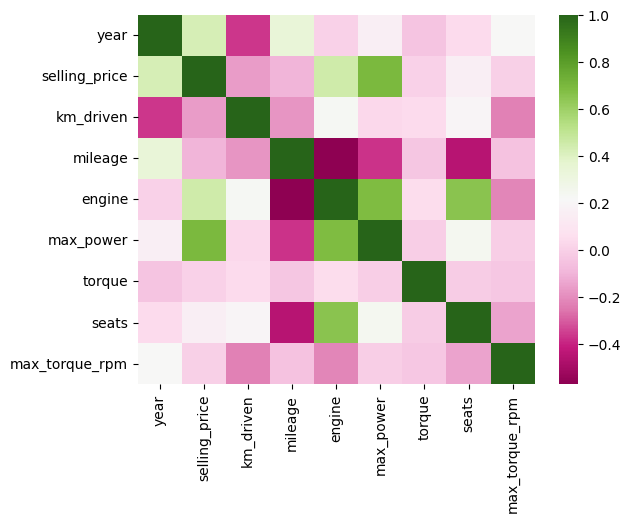

In [76]:
sns.heatmap(df_train[numeric_columns.columns].corr(), cmap="PiYG")

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`
 - `torque` и `selling_price`
 - `max_power` и `selling_price`, `year` и `selling_price`, `engine` и `selling_price`, `engine` и `seats`, `engine` и `max_power`
 - Да, коэффициент корреляции между `year` и `km_driven` отрицательный, и по модулю достаточно большой 

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [ ]:
# your code here

In [80]:
from scipy.stats import spearmanr

def spearman(x, y):
    x_ranked = np.argsort(np.argsort(x))
    y_ranked = np.argsort(np.argsort(y))

    diff = x_ranked - y_ranked
    return 1 - (6 * np.sum(diff ** 2)) / (len(x) * (len(x) ** 2 - 1))

# Пример данных

diffs = []
for _ in range(100):
    x = np.random.random(10)
    y = np.random.random(10)
    diffs.append(spearman(x, y) - spearmanr(x, y)[0])

round(np.array(diffs).mean(), 15)

0.0

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


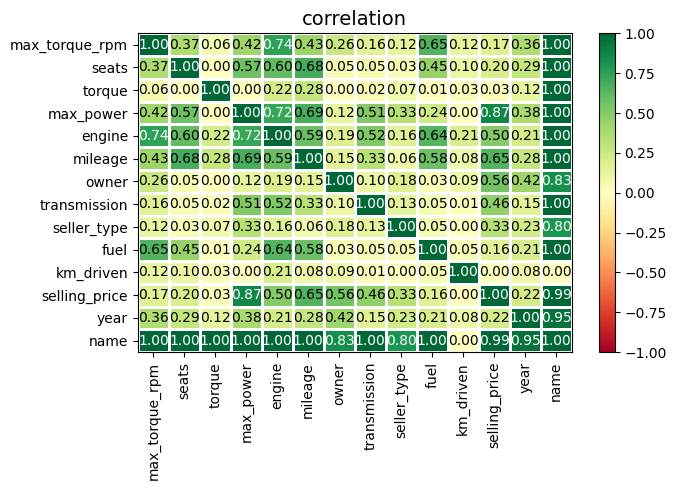

In [82]:
from phik import resources
from phik.report import plot_correlation_matrix
from phik import phik_matrix

plot_correlation_matrix(df_train.phik_matrix().values, x_labels=df_train.phik_matrix().columns, y_labels=df_train.phik_matrix().index)


`Your answer here`

С целевой переменной хорошо коррелируют следующие: `max_power`, `engine`, `mileage`, `owner`, `name`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [50]:
df_to_work = pd.concat([df_train, df_test])

In [52]:
numeric_columns = df_to_work.select_dtypes(include=['number'])
df_real = df_to_work[numeric_columns.columns].copy()

In [54]:
df_real.head()

year  selling_price  km_driven  mileage  engine  max_power      torque  \
0  2014         450000     145500    23.40    1248      74.00  190.000000   
1  2014         370000     120000    21.14    1498     103.52  250.000000   
2  2010         225000     127000    23.00    1396      90.00  219.668960   
3  2007         130000     120000    16.10    1298      88.20  112.776475   
4  2017         440000      45000    20.14    1197      81.86  113.750000   

   seats  max_torque_rpm  
0      5          2000.0  
1      5          2500.0  
2      5          2750.0  
3      5           500.0  
4      5          4000.0

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
df_train, df_test = train_test_split(df_real, test_size=0.25, random_state=42)

In [60]:
y_train = df_train.selling_price
X_train = df_train.drop('selling_price', axis = 1)

In [143]:
# assert X_train.shape == (5840, 6) -- после преобразования torque у нас теперь другое число колонок

In [62]:
y_test = df_test.selling_price
X_test = df_test.drop('selling_price', axis = 1)

In [406]:
# assert X_test.shape == (1000, 6) -- после преобразования torque у нас теперь другое число колонок

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

In [66]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred = lr.predict(X_test)

print('Linear regression MSE', MSE(y_test, lr_pred))

print('Linear regression R2', r2_score(y_test, lr_pred))

Linear regression MSE 143284132691.90463
Linear regression R2 0.5909000480013055


In [102]:
np.sqrt(MSE(y_test, lr_pred))

378528.906018952

#### Выводы

Модель имеет не самую плохую объяснительную способность, но ошибка достаточно большая 

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

$$R^2 = \frac{(\hat{y} - \overline{y})^2}{(y - \overline{y})^2},$$

где $\hat{y}$ – оценка $y$ (в нашем случае, предсказание модели), $\overline{y}$ - среднее реального значения $y$ 

In [68]:
#взято из моего же дз-3 по основам Python (pro)

def my_r2(y_true, y_pred):
    # ваш код
    if ((y_true - y_true.mean())**2).sum() == 0:
        return 0 # занулять делитель это грешно 
    else: 
        r2 = ((y_pred - y_true.mean())**2).sum()/(((y_true - y_true.mean())**2).sum())
        return r2


`Your answer here`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [70]:
# your code here

def my_adj_r2(r2, n, p):
    # ваш код
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


`Your answer here`

$R^2$ имеет одно не очень хорошее свойство – он увеличивается при включении любых переменных вне зависимости от их значимости, поэтому, как правило, лучше применять $R^2_{adj}$ для оценки качества модели и влияния переменных

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [72]:
from sklearn.preprocessing import StandardScaler

# your code here

In [74]:
scaler = StandardScaler().fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train_scaled, y_train)
lr_pred_train = lr.predict(X_train_scaled)
lr_pred = lr.predict(X_test_scaled)

# print('Linear regression MSE (train):', MSE(y_train, lr_pred_train))
print('Linear regression MSE (scaled)', MSE(y_test, lr_pred))

# print('Linear regression RMSE (train):', RMSE(y_train, lr_pred_train))
print('Linear regression R2 (scaled)', r2_score(y_test, lr_pred))

Linear regression MSE (scaled) 143284132691.90317
Linear regression R2 (scaled) 0.5909000480013096


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
# your code here

In [76]:
lr.coef_

array([176823.14288924, -50923.69411623,  -2414.53062232,  50250.19805029,
       343333.57987394,   9885.7709092 , -40850.96413488, -42774.56503643])

In [78]:
lr.intercept_

538600.9343079912

Самый большой коэффициент у года (`year`)

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [82]:
from sklearn.linear_model import Lasso

# your code here

In [84]:
clf = Lasso(alpha=0.1)
clf.fit(X_train_scaled, y_train)

lr_pred_train = lr.predict(X_train_scaled)
lr_pred = lr.predict(X_test_scaled)

# print('Linear regression MSE (train):', MSE(y_train, lr_pred_train))
print('Linear regression MSE (scaled)', MSE(y_test, lr_pred))

# print('Linear regression RMSE (train):', RMSE(y_train, lr_pred_train))
print('Linear regression R2 (scaled)', r2_score(y_test, lr_pred))

Linear regression MSE (scaled) 143284132691.90317
Linear regression R2 (scaled) 0.5909000480013096


In [86]:
np.sqrt(MSE(y_test, lr_pred))

378528.9060189501

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
# your code here

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [90]:
df_train, df_test = train_test_split(df_real, test_size=0.25, random_state=42)

y_train = df_train.selling_price
X_train = df_train.drop('selling_price', axis = 1)

In [92]:
param_grid = {
    'alpha': np.logspace(-4, 0, 50), 
    'max_iter': [1000, 5000, 10000]  
} #это сетка значений гиперпараметров – альфы и числа итераций – по которым гридсёрч перебирает значения

lasso = Lasso()

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=10,
    n_jobs=-1,  
    verbose=1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_  


Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [93]:
best_params

{'alpha': 0.0001, 'max_iter': 1000}

In [94]:
best_model = grid_search.best_estimator_
weights = best_model.coef_
np.sum(weights == 0)

0

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [456]:
# your code here

In [98]:
from sklearn.linear_model import ElasticNet

In [100]:
param_grid = {
    'alpha': np.logspace(-4, 0, 50),  
    'l1_ratio': np.linspace(0.1, 1, 10),
    'max_iter': [1000, 5000]  
}

elastic_net = ElasticNet()

grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=10,
    n_jobs=-1,  
    verbose=1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.939e+12, tolerance: 1.542e+11
  model = cd_fast.enet_coordinate_descent(
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.975e+13, tolerance: 1.498e+11
  model = cd_fast.enet_coordinate_descent(
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [101]:
best_params

{'alpha': 0.0001, 'l1_ratio': 1.0, 'max_iter': 1000}

In [102]:
best_score

130028590093.07356

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [ ]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
# your code here

In [106]:
df_to_work.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40    1248      74.00   
1  Individual       Manual  Second Owner    21.14    1498     103.52   
2  Individual       Manual   First Owner    23.00    1396      90.00   
3  Individual       Manual   First Owner    16.10    1298      88.20   
4  Individual       Manual   First Owner    20.14    1197      81.86   

       torque  seats  max_torque_rpm  
0  190.000000      5          2000.0  
1  250.000000      5          2500.0  
2  219.668960      5          2750.0  
3  112.776475      5           500.0  
4  113.750000      5          4000.0

In [108]:
df_to_work.name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Hyundai i20 Sportz Diesel', ..., 'Maruti Swift Dzire LXi',
       'Honda Accord VTi-L MT', 'Hyundai i20 Era Diesel'], dtype=object)

Есть предположение, что первое слово – марка, второе – модель, а дальше идут всякие спецификации, которые наверное и так объясняются другими переменными: тип двигателя, КПП и т.д.

In [110]:
def extract_parts(x):
    values = x.split(' ')
    brand = values[0]
    model = values[1]
    other = ' '.join(values[2:])
    return(brand, model, other)

In [112]:
brands = []
models = []
others = []

for i in df_to_work.name.values:
    brand, model, other = extract_parts(i)
    brands.append(brand)
    models.append(model)
    others.append(other)

In [190]:
print(set(brands))

{'Peugeot', 'Audi', 'Hyundai', 'Mercedes-Benz', 'Jeep', 'Volkswagen', 'MG', 'Honda', 'Toyota', 'Renault', 'Daewoo', 'Ashok', 'Isuzu', 'Mitsubishi', 'Land', 'Volvo', 'Datsun', 'Nissan', 'BMW', 'Lexus', 'Maruti', 'Tata', 'Fiat', 'Ambassador', 'Mahindra', 'Force', 'Opel', 'Chevrolet', 'Skoda', 'Kia', 'Ford', 'Jaguar'}


In [192]:
print(set(models))

{'Pajero', 'Amaze', 'Polo', 'XUV500', 'BRV', 'Figo', 'Mobilio', 'M-Class', 'Palio', '6', 'Terrano', 'Esteem', 'XE', 'Xenon', 'Classic', 'Lodgy', 'CLASSIC', 'A3', 'NuvoSport', 'Lancer', 'Zen', 'Venture', 'i20', 'Manza', 'Eeco', 'Ciaz', 'Camry', 'Koleos', 'Fiesta', 'Octavia', 'Willys', 'One', 'Estate', 'Fluence', 'Nano', 'Pulse', 'MUX', 'KUV', 'Beat', 'ES', 'Fusion', 'Trailblazer', 'X3', 'Celerio', 'Zest', 'Avventura', 'Safari', 'A6', 'EcoSport', 'Marshal', 'D-Max', 'X4', 'Getz', 'Endeavour', 'GL-Class', 'XC40', 'Laura', 'i10', 'Nexon', 'Verna', 'A-Star', 'CR-V', 'Linea', 'Q3', 'Captur', 'Marazzo', '309', 'A4', 'Cruze', 'Ingenio', 'Accord', 'Compass', 'S90', 'Yaris', 'Baleno', 'Renault', 'Scorpio', '3', 'Indica', 'E-Class', 'CLA', 'Indigo', 'Santa', 'Land', 'Ertiga', 'EON', 'Etios', 'Platinum', 'Harrier', 'Matiz', 'Xylo', 'Quanto', 'Innova', 'Astra', 'Kodiaq', 'GO', 'Accent', 'Spark', 'S-Cross', 'Jetta', 'WR-V', 'Elantra', 'Thar', 'Creta', 'Ignis', 'Grande', 'V40', 'Santro', 'Bolero', 'A

In [194]:
print(others)

['Dzire VDI', '1.5 TDI Ambition', 'Sportz Diesel', 'VXI BSIII', '1.2 VTVT E Plus', 'R LXI DUO BSIII', 'DX BSII', 'VXD', 'Diesel Celebration Edition', '110PS Diesel RxL', 'LX', 'Dzire VDi', '1.3 VXi', 'R LXI Minor', '100 mFALCON G80 K8 5str', '1.4 CRDi Asta', 'LX', '2015-2017 Asta 1.4 CRDi', '1.5 D4 BSIII', 'i-DTEC VX', 'Dzire ZDI', 'ZDI', 'Delta 1.2', '800 LXI', 'TCDi LTZ 7 Seater', 'R LXI Minor', 'E MPI STD BS IV', 'Brezza LDi Option', '1.2 ELX', '8 Seater BSIV', 'Brezza LDi', '800 CNG LXI Optional', 'K10 VXI Airbag', 'VTVT 1.6 SX Option', 'D', 'DICOR 2.2 LX 4x2', 'Std', '1.4 Limited Plus BSIV', 'i VTEC VX', 'V MT', 'Brezza VDi', 'K10 VXI', '4x4 MT', '2.5 G (Diesel) 7 Seater BS IV', 'Class B180', 'S Diesel', 'Sport 4X4', 'i DTEC S', 'VX Diesel', 'Crysta 2.8 ZX AT BSIV', '2.5 G (Diesel) 7 Seater', '2.0 TDI Technology', '2.0 TDI  Design Edition', 'C-Class 220 CDI AT', 'ELAN Quadrajet BS IV', 'Magna', 'Asta 1.4 CRDi', 'Dzire ZDI', '1.2P Titanium MT', 'Delta 1.2', '1.5 TDI Highline 16 All

Вообще выглядит так, что предположение оказалось верным – в `other` теперь лежат всякие комплектации

Будем использовать только марки, так как для всего остального получается слишком много значений – если захотим закодировать хотя бы ещё модели, получим дополнительные 200 колонок

In [114]:
def extract_brand(x):
    return x.split(' ')[0]

In [116]:
df_to_work_cat = df_to_work.copy()

df_to_work_cat['name'] = df_to_work_cat.name.apply(lambda x: extract_brand(x))
df_to_work_cat.head(5)

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
3   Maruti  2007         130000     120000  Petrol  Individual       Manual   
4  Hyundai  2017         440000      45000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power      torque  seats  max_torque_rpm  
0   First Owner    23.40    1248      74.00  190.000000      5          2000.0  
1  Second Owner    21.14    1498     103.52  250.000000      5          2500.0  
2   First Owner    23.00    1396      90.00  219.668960      5          2750.0  
3   First Owner    16.10    1298      88.20  112.776475      5           500.0  
4   First Owner    20.14    1197      81.86  113.750000      5          4000.0

In [480]:
# assert X_train_cat.shape == (5840, 11) -- тоже из-за torque

In [118]:
df_to_work_cat.describe(include='object') #пока не делим на трейн и тест

name    fuel seller_type transmission        owner
count     6840    6840        6840         6840         6840
unique      32       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      2094    3711        6060         6213         4226

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [151]:
# from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

In [120]:
df_cat = pd.get_dummies(df_to_work_cat, columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats'])
df_cat

year  selling_price  km_driven  mileage  engine  max_power      torque  \
0    2014         450000     145500    23.40    1248      74.00  190.000000   
1    2014         370000     120000    21.14    1498     103.52  250.000000   
2    2010         225000     127000    23.00    1396      90.00  219.668960   
3    2007         130000     120000    16.10    1298      88.20  112.776475   
4    2017         440000      45000    20.14    1197      81.86  113.750000   
..    ...            ...        ...      ...     ...        ...         ...   
995  2008         250000     100000    19.81    1086      68.05   99.040000   
996  2017         440000      50000    18.60    1197      81.83  114.700000   
997  2009         340000      40000    23.00    1396      90.00  219.668960   
998  2012         350000      25000    20.36    1197      78.90  111.800000   
999  2016         700000     110000    26.00    1498      98.60  200.000000   

     max_torque_rpm  name_Ambassador  name_Ashok  ...  owner_Third Owner  \
0            2000.0            False       False  ...              False   
1            2500.0            False       False  ...              False   
2            2750.0            False       False  ...              False   
3             500.0            False       False  ...              False   
4            4000.0            False       False  ...              False   
..              ...              ...         ...  ...                ...   
995          4500.0            False       False  ...              False   
996          4000.0            False       False  ...              False   
997          2750.0            False       False  ...              False   
998          4000.0            False       False  ...              False   
999          1750.0            False       False  ...              False   

     seats_2  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  seats_10  \
0      False    False     True    False    False    False    False     False   
1      False    False     True    False    False    False    False     False   
2      False    False     True    False    False    False    False     False   
3      False    False     True    False    False    False    False     False   
4      False    False     True    False    False    False    False     False   
..       ...      ...      ...      ...      ...      ...      ...       ...   
995    False    False     True    False    False    False    False     False   
996    False    False     True    False    False    False    False     False   
997    False    False     True    False    False    False    False     False   
998    False    False     True    False    False    False    False     False   
999    False    False     True    False    False    False    False     False   

     seats_14  
0       False  
1       False  
2       False  
3       False  
4       False  
..        ...  
995     False  
996     False  
997     False  
998     False  
999     False  

[6840 rows x 63 columns]

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

- Кодируемые данные не должны являться порядковыми/ранговыми
- Пропуски кодируются либо отдельной переменной, либо заполняются перед кодированием
- Набор получаемых колонок должен совпадать для тренировочной и тестировочной выборок, так что кодирование стоит делать до разбиения
- После преобразования столбцов нельзя применять к полученным бинарным значениям scaler'ы и другие инструменты
- Один из столбцов удаляется, так как он несёт избточную информацию 
- Можно удалить

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [122]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

In [124]:
df_train, df_test = train_test_split(df_cat, test_size=0.25, random_state=42)

y_train = df_train.selling_price
X_train = df_train.drop('selling_price', axis = 1)

y_test = df_test.selling_price
X_test = df_test.drop('selling_price', axis = 1)

In [126]:
ridge = Ridge()

param_grid = {'alpha': np.logspace(-4, 4, 20)} 


grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']


/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88731e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.56418e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.55483e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.91049e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/li

In [128]:
best_alpha

0.615848211066026

In [130]:
y_pred = best_model.predict(X_test)
print('MSE', MSE(y_test, y_pred))

print('R2', r2_score(y_test, y_pred))

MSE 90765698290.77461
R2 0.7408488845465733


In [132]:
np.sqrt(MSE(y_test, y_pred))

301273.4609798457

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [134]:
def business_metrics(y_true, y_pred):
    # your code here
    diff = np.abs(y_true - y_pred)
    diff = diff/y_true
    return len(diff[diff < 0.1])/len(diff)


In [136]:
df_train, df_test = train_test_split(df_real, test_size=0.25, random_state=42)

y_train = df_train.selling_price
X_train = df_train.drop('selling_price', axis = 1)

y_test = df_test.selling_price
X_test = df_test.drop('selling_price', axis = 1)

lr = LinearRegression().fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred = lr.predict(X_test)

print('Business Metric, Linear regression', business_metrics(y_test, lr_pred))

scaler = StandardScaler().fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train_scaled, y_train)
lr_pred_train = lr.predict(X_train_scaled)
lr_pred_scled = lr.predict(X_test_scaled)

print('Business Metric, Linear regression, Scaled', business_metrics(y_test, lr_pred_scled))

clf = Lasso(alpha=0.1)
clf.fit(X_train_scaled, y_train)

lr_pred_train = lr.predict(X_train_scaled)
lr_pred_lasso = lr.predict(X_test_scaled)

print('Business Metric, Lasso, Scaled', business_metrics(y_test, lr_pred_lasso))

df_train, df_test = train_test_split(df_cat, test_size=0.25, random_state=42)

y_train = df_train.selling_price
X_train = df_train.drop('selling_price', axis = 1)

y_test = df_test.selling_price
X_test = df_test.drop('selling_price', axis = 1)

ridge = Ridge()

param_grid = {'alpha': np.logspace(-4, 4, 20)} 

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print('Business Metric, Ridge, Categorical', business_metrics(y_test, y_pred))

Business Metric, Linear regression 0.20935672514619882
Business Metric, Linear regression, Scaled 0.20935672514619882
Business Metric, Lasso, Scaled 0.20935672514619882


/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88731e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.56418e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.55483e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.91049e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/li

Business Metric, Ridge, Categorical 0.28654970760233917


Ridge

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Вообще использовать одну и ту же метрику для отслеживания сразу двух характеристик (качество в целом и доля недопрогнозов) – это не очень удобно, так как не даёт чистого инсайта – мы в целом плохо оцениваем, или у нас много недопрогнозов? Что для нас хуже – 10 недопрогнозов на 5-10% или 1 перепрогноз на 100%? Попробуем сделать кастомную метрику со свободным весом, которая будет являться модификацией метрики выше; свободный вес устанавливаем сами, после синка с продактом))

In [138]:
def your_business_metrics(y_true, y_pred, alpha = 2):
    # будем считать долю перепрогнозов и недопрогнозов в пределе 10% и потом складывать с весами
    diff = y_true - y_pred
    diff = diff/y_true
    positive_share = len(diff[(diff < 0.1)&(diff >= 0)])/len(diff) # перепрогнозы в пределах 10%
    negative_share = len(diff[(diff > -0.1)&(diff <= 0)])/len(diff) # недопрогнозы в пределах 10%
    return positive_share + negative_share/alpha # недопрогнозы штрафуем в соответствии с альфой, при альфа = 1 получаем по сути просто business_metrics

your_business_metrics(y_test, y_pred)

0.21608187134502926

In [140]:
df_train, df_test = train_test_split(df_real, test_size=0.25, random_state=42)

y_train = df_train.selling_price
X_train = df_train.drop('selling_price', axis = 1)

y_test = df_test.selling_price
X_test = df_test.drop('selling_price', axis = 1)

lr = LinearRegression().fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred = lr.predict(X_test)

print('Business Metric, Linear regression', your_business_metrics(y_test, lr_pred))

scaler = StandardScaler().fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train_scaled, y_train)
lr_pred_train = lr.predict(X_train_scaled)
lr_pred_scled = lr.predict(X_test_scaled)

print('Business Metric, Linear regression, Scaled', your_business_metrics(y_test, lr_pred_scled))

clf = Lasso(alpha=0.1)
clf.fit(X_train_scaled, y_train)

lr_pred_train = lr.predict(X_train_scaled)
lr_pred_lasso = lr.predict(X_test_scaled)

print('Business Metric, Lasso, Scaled', your_business_metrics(y_test, lr_pred_lasso))

df_train, df_test = train_test_split(df_cat, test_size=0.25, random_state=42)

y_train = df_train.selling_price
X_train = df_train.drop('selling_price', axis = 1)

y_test = df_test.selling_price
X_test = df_test.drop('selling_price', axis = 1)

ridge = Ridge()

param_grid = {'alpha': np.logspace(-4, 4, 20)} 

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print('Business Metric, Ridge, Categorical', your_business_metrics(y_test, y_pred))

Business Metric, Linear regression 0.156140350877193
Business Metric, Linear regression, Scaled 0.156140350877193
Business Metric, Lasso, Scaled 0.156140350877193


/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88731e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.56418e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.55483e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.91049e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/li

Business Metric, Ridge, Categorical 0.21608187134502926


Ridge

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [142]:
pip install fastapi

Note: you may need to restart the kernel to use updated packages.


In [148]:
### обучим и сохраним модель

In [150]:
df_train, df_test = train_test_split(df_cat, test_size=0.25, random_state=42)

y_train = df_train.selling_price
X_train = df_train.drop('selling_price', axis = 1)

y_test = df_test.selling_price
X_test = df_test.drop('selling_price', axis = 1)

ridge = Ridge()

param_grid = {'alpha': np.logspace(-4, 4, 20)} 


grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88731e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.56418e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.55483e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.91049e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mdsemkin/anaconda3/li

In [152]:
best_model.fit(X_train, y_train)

Ridge(alpha=0.615848211066026)

In [158]:
import joblib

In [164]:
joblib.dump(best_model, 'ridge_model.pkl')

['ridge_model.pkl']

In [175]:
pip install python-multipart

Note: you may need to restart the kernel to use updated packages.


In [177]:
from fastapi import FastAPI, UploadFile, File
from pydantic import BaseModel
from typing import List
import joblib
import pandas as pd
from io import StringIO

app = FastAPI()

model = joblib.load("ridge_model.pkl")

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

class Items(BaseModel):
    objects: List[Item]

@app.post("/predict_item")
def predict_item(item: Item) -> float:
    values = [[item.name, item.year, item.selling_price, item.km_driven, item.fuel, item.seller_type,
               item.transmission, item.owner, item.mileage, item.engine, item.max_power, item.torque, item.seats]]
    return model.predict(values)[0]

@app.post("/predict_items")
def predict_items(items: Items) -> List[float]:
    values = [[item.name, item.year, item.selling_price, item.km_driven, item.fuel, item.seller_type,
               item.transmission, item.owner, item.mileage, item.engine, item.max_power,
               item.torque, item.seats] for item in items.objects]
    predictions = model.predict(values)
    return predictions.tolist()

@app.post("/predict_csv")
async def predict_csv(file: UploadFile = File(...)):
    content = await file.read()
    df = pd.read_csv(StringIO(content.decode("utf-8")))
    features = df[["name", "year", "selling_price", "km_driven", "fuel", "seller_type", "transmission", 
                   "owner", "mileage", "engine", "max_power", "torque", "seats"]].values
    predictions = model.predict(features)
    df['predicted_price'] = predictions
    output_file = "predicted_prices.csv"
    df.to_csv(output_file, index=False)
    return {"file_path": output_file}


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>